In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import Layout, interact, IntSlider
from IPython.display import Image
%config InlineBackend.figure_format = 'retina'

<div class="alert alert-block alert-info">
<h1> Central Limit theorem  </h1>

##### <font size="4"> The central limit theorem states that if one takes sufficiently large samples from a population, the samples’ means will be normally distributed, even if the population isn’t normally distributed.  </font>


<font size="6"> $X_1,..X_n$ </font> independent and identically distributed

<font size="6"> $\bar{x} = \frac{X_1+X_2+..X_n}{n}$  </font> has an expected value of $μ$ and variance $σ^2/n$

<font size="6"> $\frac{(\bar{x} - μ)}{(σ/√n)}$</font> converges to a standard normal distribution as sample size n tends to infinity

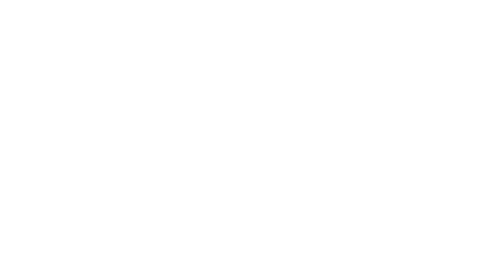

In [2]:
# A short animation of CLT

display(Image(data=open('/Users/raghavendrakommavarapu/Documents/gif_try2.gif','rb').read(), format='png',width=700))

In [3]:
# picking samples

def pick_sample(dist, sample_size):
    if dist == 'normal':
        # picking samples from norm dist with mean 3 and std deviation 0.5
        sample = np.random.normal(3, 0.5, sample_size)
    if dist == 'exponential':
        # picking samples from exponential dist with mean 3 and std dev 3
        sample = np.random.exponential(3, sample_size)
    if dist == 'poisson':
        # picking samples from poisson dist with mean 3 and std dev sqrt(3)=1.732
        sample = np.random.poisson(3, sample_size)
    if dist == 'uniform':
        # picking samples from uniform dist with mean 3 and std dev sqrt(3)=1.732'
        sample = np.random.uniform(0, 6, sample_size)

    return sample

In [7]:
pick_sample('uniform', 10)

array([1.57763992, 3.01228928, 1.95645522, 2.74712664, 2.14256982,
       3.51979271, 5.49545039, 3.32524188, 0.27648891, 2.89925748])

In [4]:
# get the sampling distribution

def get_sampling_dist(dist, sample_size, no_of_samples):
    pop_var = 0.25 if dist == 'normal' else 9 if dist == 'exponential' else 3 if dist == 'poisson' else 3
    print(
        f"""\npicking {no_of_samples} samples each of size {sample_size} from {dist} dist with mean 3 and variance {pop_var}""")

    sampling_dist = []
    for i in range(no_of_samples):
        sample = pick_sample(dist, sample_size)
        sample_mean = np.mean(sample)
        sampling_dist.append(sample_mean)
    print("")
    print(f'sampling distribution mean is :{np.mean(sampling_dist)}')
    print(f'sampling distribution variance is :{np.var(sampling_dist)}')
    print("")
    print(
        f'By Central Limit Theorem, sampling distribution variance should be [population variance/sample size]:{(pop_var)/sample_size}')
    print("")

    return sampling_dist

In [5]:
def plot_and_info_of_sampling_dist(dist, sample_size, no_of_samples, bins=10):
    sampling_dist = get_sampling_dist(
        dist=dist, sample_size=sample_size, no_of_samples=no_of_samples)
    sns.set_style('darkgrid')
    sns.displot(sampling_dist, kde=True, height=5, aspect=1.5).set(
        title=f'sampling distribution [{dist} dist samples]')

## <span style="color:#733175"> Simulation

<span style="color:#733175"> Simulating the sampling distribution for samples from various population distribution and checking the plot, mean, variance to validate central limit theorem

In [8]:
interact(plot_and_info_of_sampling_dist, dist=['normal', 'poisson', 'exponential', 'uniform'],
         sample_size=IntSlider(min=1, max=10000, step=1, value=70, layout=Layout(width='1000px')), \
         no_of_samples=IntSlider(min=1, max=10000, step=1, value=1000, layout=Layout(width='1000px')))

interactive(children=(Dropdown(description='dist', options=('normal', 'poisson', 'exponential', 'uniform'), va…

<function __main__.plot_and_info_of_sampling_dist(dist, sample_size, no_of_samples, bins=10)>